# SPY 200-Day SMA Regime Analysis (2015-2025)

**Objective:** Identify market regimes using SPY and 200-day moving average to understand when H5 performs well vs poorly.

**Key Question:** What market conditions exist during H5's weak period (2015-2021) vs strong period (2022-2024)?

---

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configuration
plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 11
plt.rcParams['lines.linewidth'] = 2

print("✓ Imports complete")

✓ Imports complete


## 1. Fetch SPY Data

In [7]:
# Fetch SPY data from Yahoo Finance
print("Fetching SPY data from Yahoo Finance...")

spy_ticker = "SPY"
start_date = "2015-01-01"
end_date = "2025-10-31"

spy_data = yf.download(spy_ticker, start=start_date, end=end_date, progress=False, auto_adjust=False)

# Flatten multi-index if present
if isinstance(spy_data.columns, pd.MultiIndex):
    spy_data.columns = spy_data.columns.get_level_values(0)

print(f"✓ Fetched {len(spy_data)} days of SPY data")
print(f"  Date range: {spy_data.index[0].date()} to {spy_data.index[-1].date()}")

# Display first few rows
spy_data.head()

Fetching SPY data from Yahoo Finance...
✓ Fetched 2724 days of SPY data
  Date range: 2015-01-02 to 2025-10-30


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,171.093674,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05,168.003784,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06,166.421371,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07,168.495209,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08,171.485138,205.899994,206.160004,203.990005,204.009995,147217800


## 2. Calculate Moving Averages and Regimes

In [8]:
# Calculate moving averages
spy_data['SMA_50'] = spy_data['Close'].rolling(window=50).mean()
spy_data['SMA_100'] = spy_data['Close'].rolling(window=100).mean()
spy_data['SMA_200'] = spy_data['Close'].rolling(window=200).mean()

# Calculate distance from 200 SMA
spy_data['Distance_from_200SMA'] = (spy_data['Close'] - spy_data['SMA_200']) / spy_data['SMA_200'] * 100

# Identify regime
spy_data['Above_200SMA'] = spy_data['Close'] > spy_data['SMA_200']
spy_data['Regime'] = spy_data['Above_200SMA'].map({True: 'Bullish', False: 'Bearish'})

print("✓ Moving averages and regimes calculated")

# Display statistics
spy_data[['Close', 'SMA_50', 'SMA_100', 'SMA_200', 'Distance_from_200SMA', 'Regime']].tail(10)

✓ Moving averages and regimes calculated


Price,Close,SMA_50,SMA_100,SMA_200,Distance_from_200SMA,Regime
Date,,,,,,
2025-10-17,664.390015,654.669197,634.857700,604.90210,9.834304,Bullish
2025-10-20,671.299988,655.351597,635.693400,605.32820,10.898516,Bullish
2025-10-21,671.289978,656.058997,636.505800,605.76145,10.817547,Bullish
2025-10-22,667.799988,656.561196,637.289899,606.14070,10.172438,Bullish
2025-10-23,671.760010,657.098596,638.080399,606.52270,10.755955,Bullish
2025-10-24,677.250000,657.744596,638.891999,606.96580,11.579598,Bullish
2025-10-27,685.239990,658.580596,639.785099,607.44455,12.807003,Bullish
2025-10-28,687.059998,659.455796,640.725199,607.97740,13.007490,Bullish
2025-10-29,687.390015,660.407396,641.607699,608.50740,12.963296,Bullish


## 3. Regime Statistics

In [9]:
# Overall regime statistics
print("=" * 80)
print("REGIME STATISTICS (2015-2025)")
print("=" * 80)
print()

regime_counts = spy_data['Regime'].value_counts()
regime_pct = spy_data['Regime'].value_counts(normalize=True) * 100

print("Days in each regime:")
for regime in ['Bullish', 'Bearish']:
    if regime in regime_counts:
        days = regime_counts[regime]
        pct = regime_pct[regime]
        print(f"  {regime:10s}: {days:4d} days ({pct:5.1f}%)")

# Regime transitions
spy_data['Regime_Change'] = spy_data['Regime'] != spy_data['Regime'].shift(1)
transitions = spy_data[spy_data['Regime_Change'] == True]
print(f"\nTotal regime transitions: {len(transitions)}")
print(f"Average days per regime: {len(spy_data) / len(transitions):.1f} days")

REGIME STATISTICS (2015-2025)

Days in each regime:
  Bullish   : 2028 days ( 74.4%)
  Bearish   :  696 days ( 25.6%)

Total regime transitions: 70
Average days per regime: 38.9 days


## 4. H5 Period Comparison

In [10]:
# Compare H5 weak vs strong periods
print("=" * 80)
print("H5 STRATEGY PERIOD COMPARISON")
print("=" * 80)
print()

h5_weak = spy_data[(spy_data.index >= '2015-01-01') & (spy_data.index <= '2021-12-31')]
h5_strong = spy_data[(spy_data.index >= '2022-01-01') & (spy_data.index <= '2024-12-31')]

def print_period_stats(data, period_name):
    bullish_days = (data['Regime'] == 'Bullish').sum()
    total_days = len(data)
    avg_distance = data['Distance_from_200SMA'].mean()
    spy_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
    volatility = data['Close'].pct_change().std() * np.sqrt(252) * 100  # Annualized vol

    print(f"{period_name}:")
    print(f"  Days above 200 SMA: {bullish_days}/{total_days} ({bullish_days/total_days*100:.1f}%)")
    print(f"  Avg distance from 200 SMA: {avg_distance:+.1f}%")
    print(f"  SPY total return: {spy_return:+.1f}%")
    print(f"  SPY annualized volatility: {volatility:.1f}%")
    print()

print_period_stats(h5_weak, "H5 WEAK PERIOD (2015-2021)")
print_period_stats(h5_strong, "H5 STRONG PERIOD (2022-2024)")

# Key insight
print("KEY INSIGHT:")
if h5_weak['Distance_from_200SMA'].mean() > h5_strong['Distance_from_200SMA'].mean():
    print("  → 2015-2021 was MORE bullish (higher distance from 200 SMA) but H5 performed WORSE")
    print("  → This suggests H5 struggles in TRENDING/LOW-VOLATILITY bull markets")
    print("  → H5 prefers CHOPPY/HIGH-VOLATILITY markets (2022-2024)")
else:
    print("  → 2022-2024 was MORE bullish but H5 performed BETTER")
    print("  → This suggests H5 benefits from higher volatility despite market direction")

H5 STRATEGY PERIOD COMPARISON

H5 WEAK PERIOD (2015-2021):
  Days above 200 SMA: 1348/1763 (76.5%)
  Avg distance from 200 SMA: +5.1%
  SPY total return: +131.2%
  SPY annualized volatility: 17.8%

H5 STRONG PERIOD (2022-2024):
  Days above 200 SMA: 514/753 (68.3%)
  Avg distance from 200 SMA: +3.3%
  SPY total return: +22.7%
  SPY annualized volatility: 17.6%

KEY INSIGHT:
  → 2015-2021 was MORE bullish (higher distance from 200 SMA) but H5 performed WORSE
  → This suggests H5 struggles in TRENDING/LOW-VOLATILITY bull markets
  → H5 prefers CHOPPY/HIGH-VOLATILITY markets (2022-2024)


## 5. Main Visualization: SPY with 200 SMA

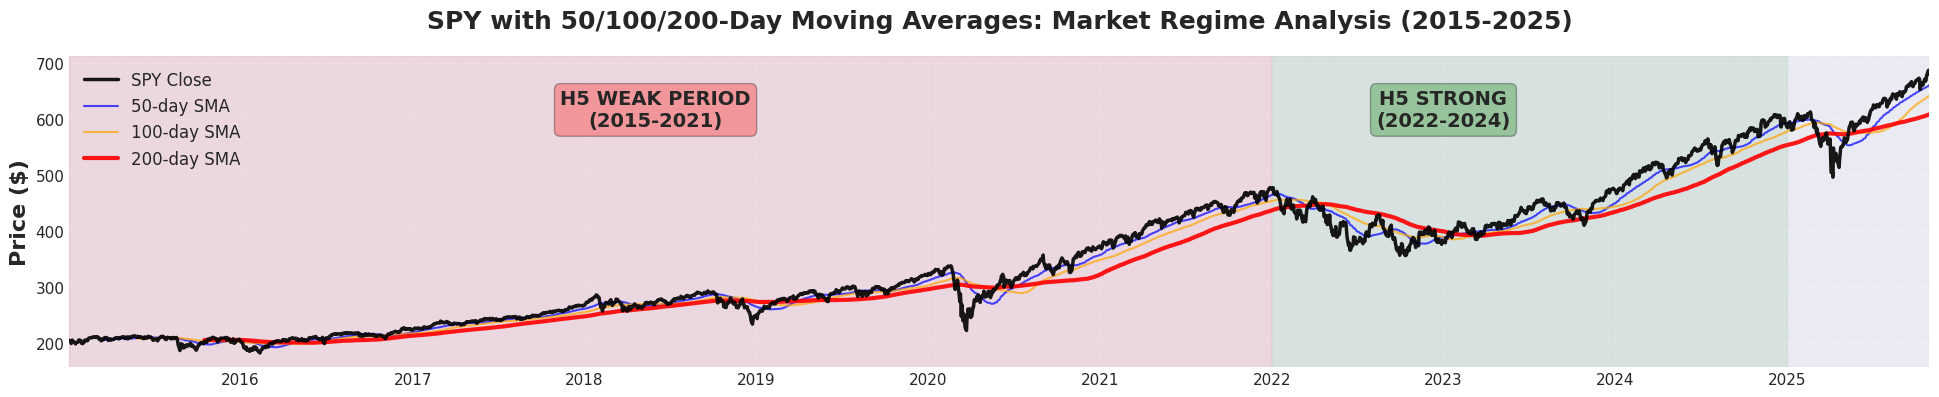

In [11]:
# Create comprehensive visualization
fig = plt.figure(figsize=(24, 16))
gs = fig.add_gridspec(5, 1, hspace=0.4, height_ratios=[2, 1, 1, 1, 1])

# Plot 1: SPY Price with Moving Averages
ax1 = fig.add_subplot(gs[0, 0])

# Plot price and SMAs
ax1.plot(spy_data.index, spy_data['Close'], linewidth=2.5, color='black', label='SPY Close', alpha=0.9, zorder=5)
ax1.plot(spy_data.index, spy_data['SMA_50'], linewidth=1.5, color='blue', label='50-day SMA', alpha=0.7)
ax1.plot(spy_data.index, spy_data['SMA_100'], linewidth=1.5, color='orange', label='100-day SMA', alpha=0.7)
ax1.plot(spy_data.index, spy_data['SMA_200'], linewidth=3, color='red', label='200-day SMA', alpha=0.9, zorder=4)

# Shade H5 periods
ax1.axvspan(datetime(2015, 1, 1), datetime(2021, 12, 31), alpha=0.08, color='red', zorder=1)
ax1.axvspan(datetime(2022, 1, 1), datetime(2024, 12, 31), alpha=0.08, color='green', zorder=1)

# Add period labels
ax1.text(datetime(2018, 6, 1), spy_data['Close'].max() * 0.95, 'H5 WEAK PERIOD\n(2015-2021)',
         fontsize=14, ha='center', va='top', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
ax1.text(datetime(2023, 1, 1), spy_data['Close'].max() * 0.95, 'H5 STRONG\n(2022-2024)',
         fontsize=14, ha='center', va='top', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))

ax1.set_ylabel('Price ($)', fontsize=16, fontweight='bold')
ax1.set_title('SPY with 50/100/200-Day Moving Averages: Market Regime Analysis (2015-2025)',
              fontsize=18, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(spy_data.index[0], spy_data.index[-1])

plt.show()

## 6. Distance from 200 SMA

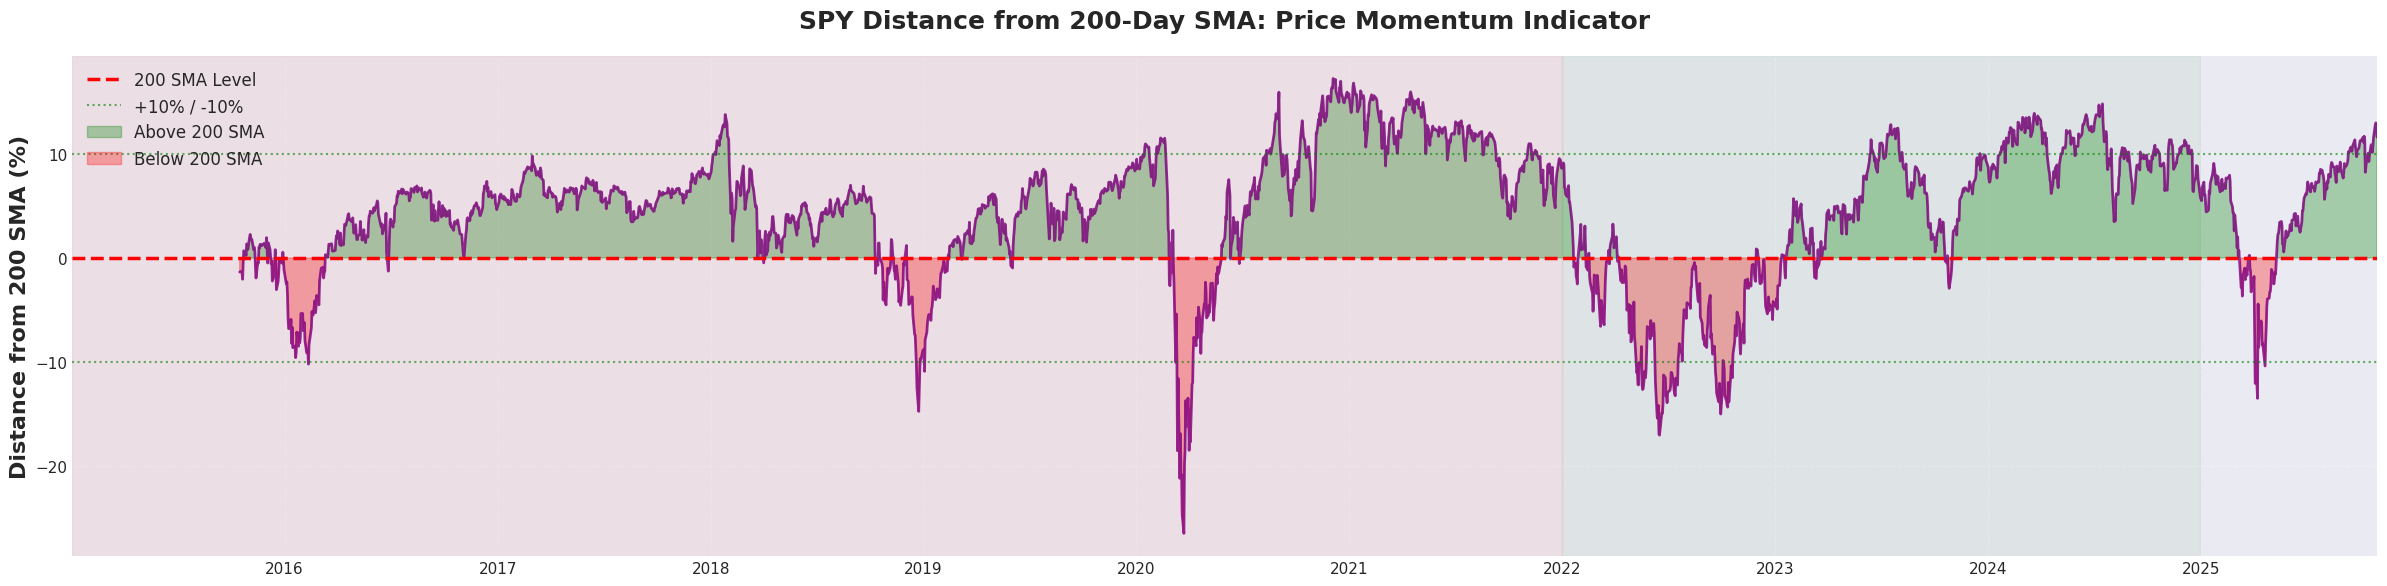

In [12]:
# Plot distance from 200 SMA
fig, ax = plt.subplots(figsize=(24, 6))

ax.plot(spy_data.index, spy_data['Distance_from_200SMA'], linewidth=2, color='purple', alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2.5, label='200 SMA Level', zorder=10)
ax.axhline(y=10, color='green', linestyle=':', linewidth=1.5, alpha=0.6, label='+10% / -10%')
ax.axhline(y=-10, color='green', linestyle=':', linewidth=1.5, alpha=0.6)

# Fill areas
ax.fill_between(spy_data.index, 0, spy_data['Distance_from_200SMA'],
                 where=spy_data['Distance_from_200SMA'] > 0, alpha=0.3, color='green', label='Above 200 SMA')
ax.fill_between(spy_data.index, 0, spy_data['Distance_from_200SMA'],
                 where=spy_data['Distance_from_200SMA'] < 0, alpha=0.3, color='red', label='Below 200 SMA')

# Shade H5 periods
ax.axvspan(datetime(2015, 1, 1), datetime(2021, 12, 31), alpha=0.05, color='red')
ax.axvspan(datetime(2022, 1, 1), datetime(2024, 12, 31), alpha=0.05, color='green')

ax.set_ylabel('Distance from 200 SMA (%)', fontsize=16, fontweight='bold')
ax.set_title('SPY Distance from 200-Day SMA: Price Momentum Indicator',
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(spy_data.index[0], spy_data.index[-1])

plt.tight_layout()
plt.show()

## 7. Regime Timeline

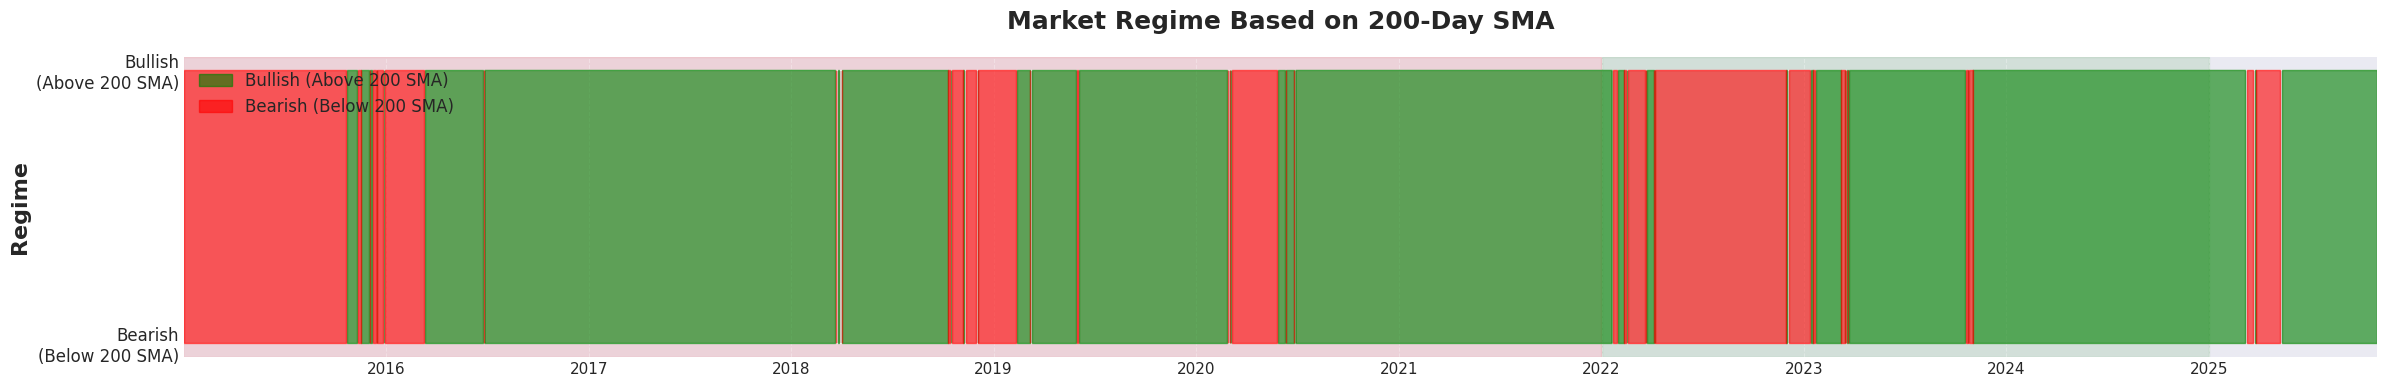

In [13]:
# Regime timeline visualization
fig, ax = plt.subplots(figsize=(24, 4))

regime_numeric = spy_data['Above_200SMA'].astype(int)

ax.fill_between(spy_data.index, 0, 1, where=regime_numeric == 1,
                 alpha=0.6, color='green', label='Bullish (Above 200 SMA)', step='mid')
ax.fill_between(spy_data.index, 0, 1, where=regime_numeric == 0,
                 alpha=0.6, color='red', label='Bearish (Below 200 SMA)', step='mid')

# Mark H5 periods
ax.axvspan(datetime(2015, 1, 1), datetime(2021, 12, 31), alpha=0.1, color='red', zorder=0)
ax.axvspan(datetime(2022, 1, 1), datetime(2024, 12, 31), alpha=0.1, color='green', zorder=0)

ax.set_ylabel('Regime', fontsize=16, fontweight='bold')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Bearish\n(Below 200 SMA)', 'Bullish\n(Above 200 SMA)'], fontsize=12)
ax.set_title('Market Regime Based on 200-Day SMA',
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')
ax.set_xlim(spy_data.index[0], spy_data.index[-1])

plt.tight_layout()
plt.show()

## 8. Annual Statistics

ANNUAL STATISTICS

      % Days Above 200 SMA  Annual Return (%)  Avg Distance (%)
Year                                                           
2015                  11.5               -0.8               0.1
2016                  81.0               11.2               2.2
2017                 100.0               18.5               6.3
2018                  79.7               -7.0               3.3
2019                  87.7               28.7               3.8
2020                  75.5               15.1               4.9
2021                 100.0               28.8              11.3
2022                  15.1              -19.9              -5.3
2023                  89.6               24.8               5.0
2024                 100.0               24.0              10.3
2025                  79.8               16.3               4.7



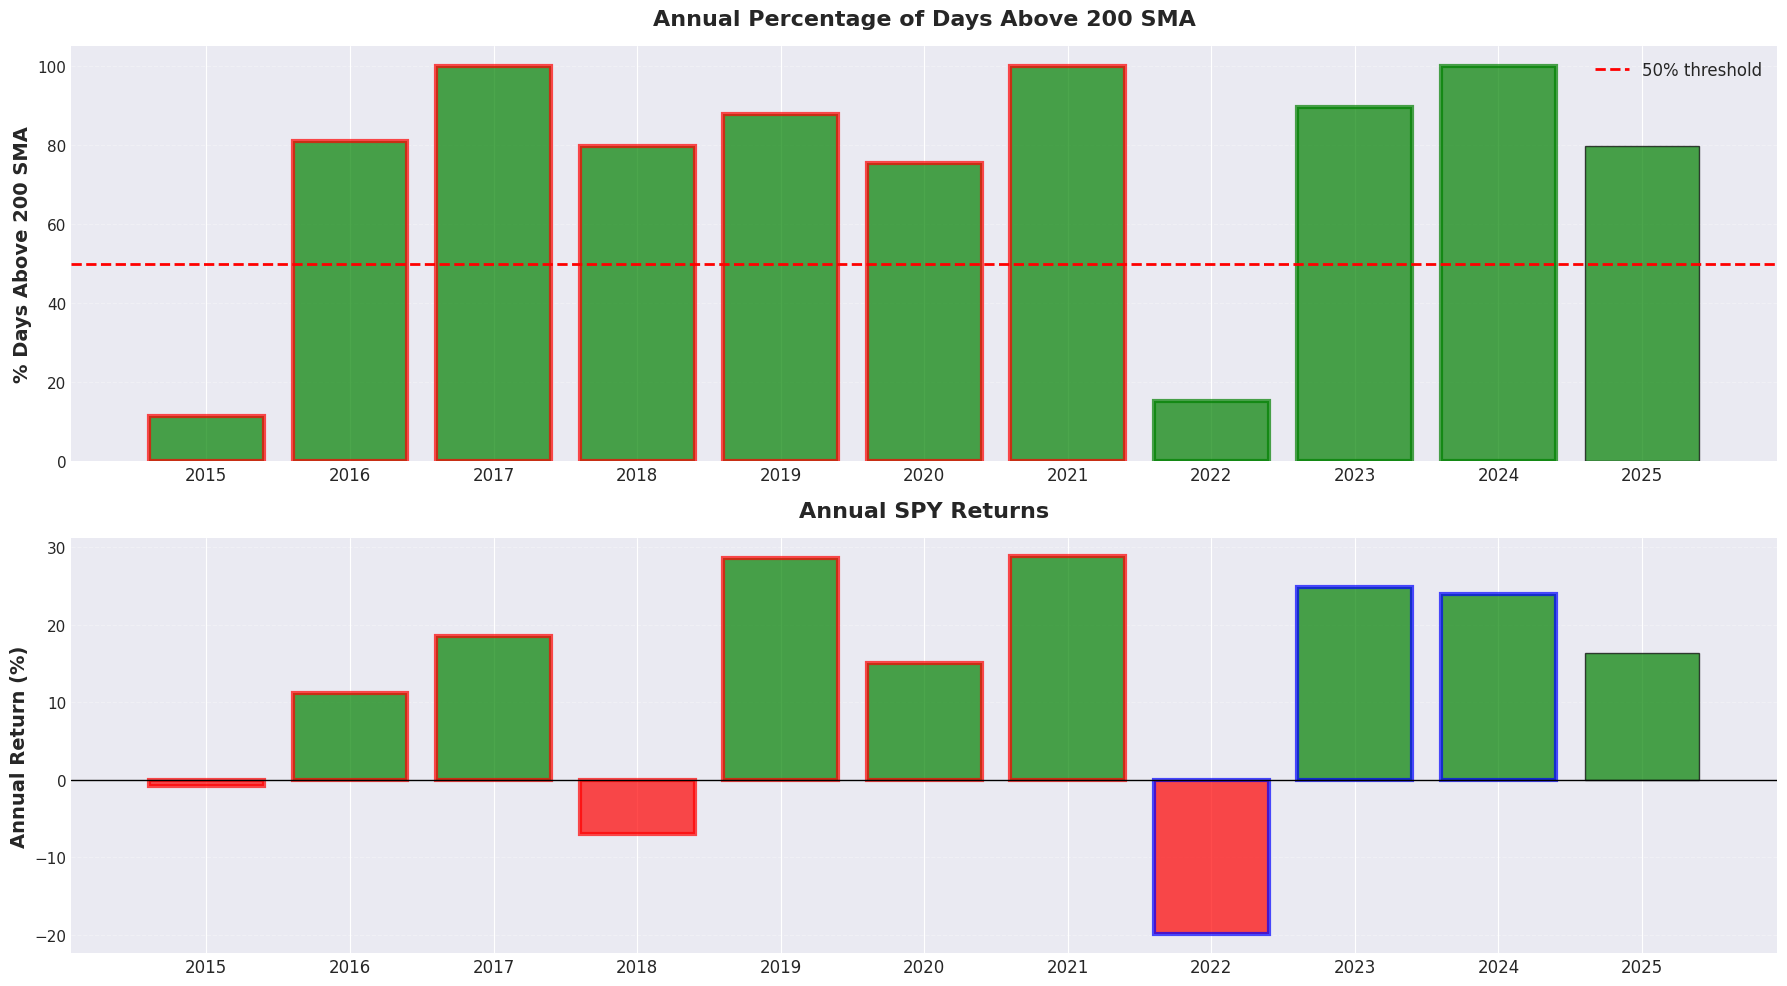

In [14]:
# Annual statistics
spy_data['Year'] = spy_data.index.year
annual_stats = spy_data.groupby('Year').agg({
    'Above_200SMA': lambda x: (x.sum() / len(x)) * 100,  # % days above 200 SMA
    'Close': lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100,  # Annual return %
    'Distance_from_200SMA': 'mean'  # Avg distance
})
annual_stats.columns = ['% Days Above 200 SMA', 'Annual Return (%)', 'Avg Distance (%)']

# Display table
print("=" * 80)
print("ANNUAL STATISTICS")
print("=" * 80)
print()
print(annual_stats.round(1))
print()

# Plot annual statistics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

years = annual_stats.index
x_pos = np.arange(len(years))

# Plot 1: % Days above 200 SMA
bars1 = ax1.bar(x_pos, annual_stats['% Days Above 200 SMA'], color='green', alpha=0.7, edgecolor='black')
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% threshold')
ax1.set_ylabel('% Days Above 200 SMA', fontsize=14, fontweight='bold')
ax1.set_title('Annual Percentage of Days Above 200 SMA',
              fontsize=16, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(years, fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')

# Highlight H5 periods
for i, year in enumerate(years):
    if year <= 2021:
        bars1[i].set_edgecolor('red')
        bars1[i].set_linewidth(3)
    elif year <= 2024:
        bars1[i].set_edgecolor('green')
        bars1[i].set_linewidth(3)

# Plot 2: Annual returns
colors = ['green' if r > 0 else 'red' for r in annual_stats['Annual Return (%)']]
bars2 = ax2.bar(x_pos, annual_stats['Annual Return (%)'], color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('Annual Return (%)', fontsize=14, fontweight='bold')
ax2.set_title('Annual SPY Returns',
              fontsize=16, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(years, fontsize=12)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

# Highlight H5 periods
for i, year in enumerate(years):
    if year <= 2021:
        bars2[i].set_edgecolor('red')
        bars2[i].set_linewidth(3)
    elif year <= 2024:
        bars2[i].set_edgecolor('blue')
        bars2[i].set_linewidth(3)

plt.tight_layout()
plt.show()

## 9. Volatility Analysis

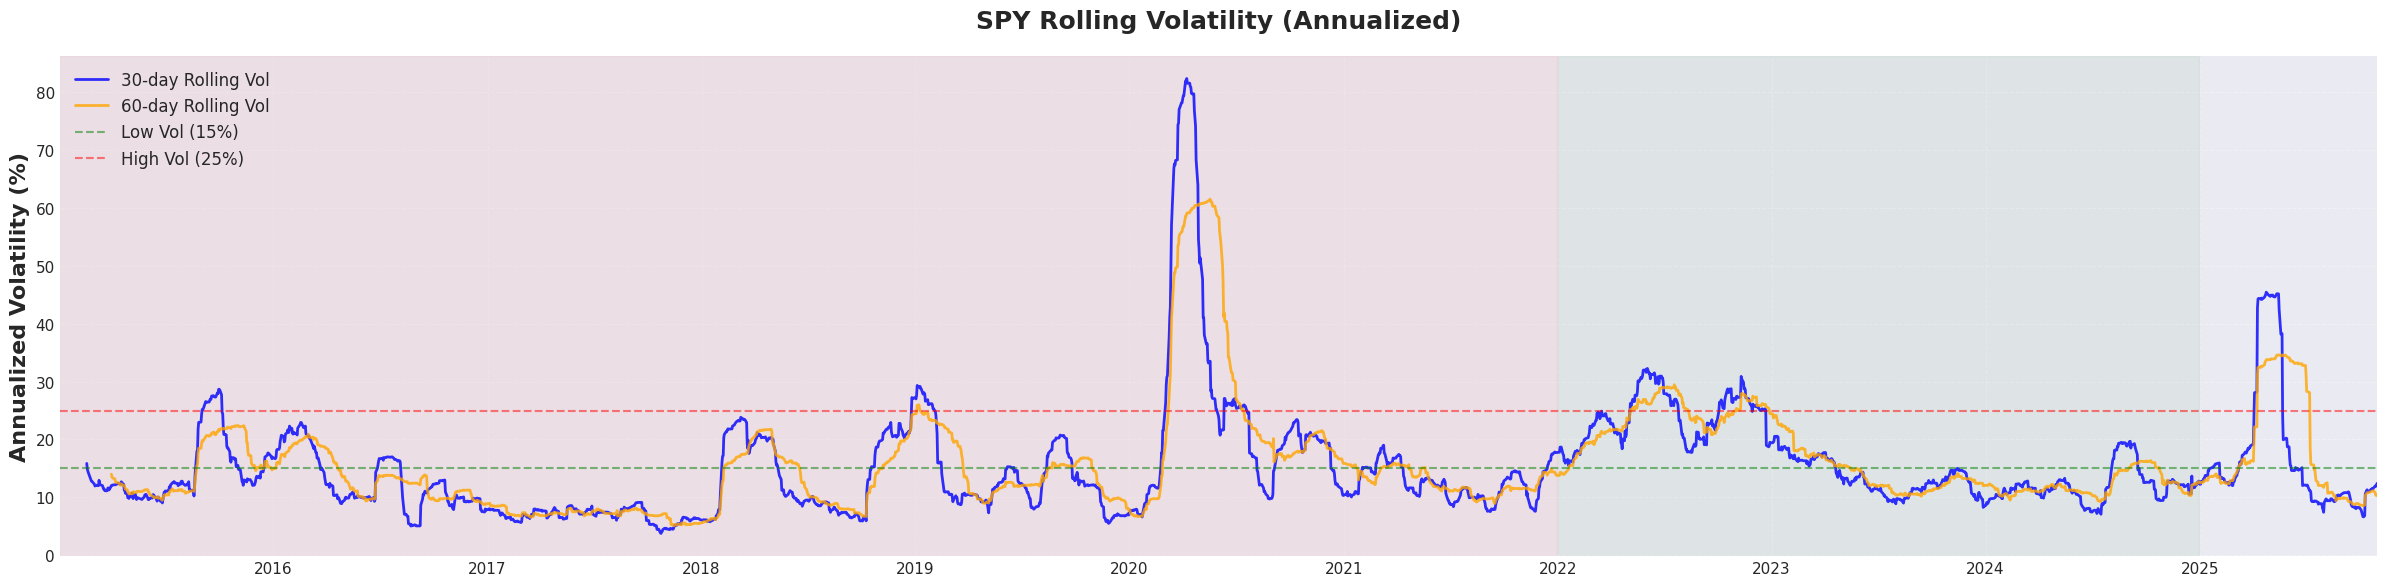


VOLATILITY COMPARISON:
  H5 Weak Period (2015-2021):  15.0% annualized vol
  H5 Strong Period (2022-2024): 16.7% annualized vol
  Difference: +1.7%

  → H5 performs BETTER in HIGHER volatility periods


In [15]:
# Calculate rolling volatility
spy_data['Returns'] = spy_data['Close'].pct_change()
spy_data['Rolling_Vol_30'] = spy_data['Returns'].rolling(window=30).std() * np.sqrt(252) * 100
spy_data['Rolling_Vol_60'] = spy_data['Returns'].rolling(window=60).std() * np.sqrt(252) * 100

# Plot volatility
fig, ax = plt.subplots(figsize=(24, 6))

ax.plot(spy_data.index, spy_data['Rolling_Vol_30'], linewidth=2, color='blue', label='30-day Rolling Vol', alpha=0.8)
ax.plot(spy_data.index, spy_data['Rolling_Vol_60'], linewidth=2, color='orange', label='60-day Rolling Vol', alpha=0.8)

# Add threshold lines
ax.axhline(y=15, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='Low Vol (15%)')
ax.axhline(y=25, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='High Vol (25%)')

# Shade H5 periods
ax.axvspan(datetime(2015, 1, 1), datetime(2021, 12, 31), alpha=0.05, color='red')
ax.axvspan(datetime(2022, 1, 1), datetime(2024, 12, 31), alpha=0.05, color='green')

ax.set_ylabel('Annualized Volatility (%)', fontsize=16, fontweight='bold')
ax.set_title('SPY Rolling Volatility (Annualized)',
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(spy_data.index[0], spy_data.index[-1])

plt.tight_layout()
plt.show()

# Compare volatility in H5 periods
h5_weak_vol = spy_data.loc[(spy_data.index >= '2015-01-01') & (spy_data.index <= '2021-12-31'), 'Rolling_Vol_60'].mean()
h5_strong_vol = spy_data.loc[(spy_data.index >= '2022-01-01') & (spy_data.index <= '2024-12-31'), 'Rolling_Vol_60'].mean()

print("\nVOLATILITY COMPARISON:")
print(f"  H5 Weak Period (2015-2021):  {h5_weak_vol:.1f}% annualized vol")
print(f"  H5 Strong Period (2022-2024): {h5_strong_vol:.1f}% annualized vol")
print(f"  Difference: {h5_strong_vol - h5_weak_vol:+.1f}%")
print()
if h5_strong_vol > h5_weak_vol:
    print("  → H5 performs BETTER in HIGHER volatility periods")
else:
    print("  → H5 performs BETTER in LOWER volatility periods")

## 10. Summary & Conclusions

In [16]:
# Generate summary
print("="*80)
print("SUMMARY & CONCLUSIONS")
print("="*80)
print()

print("H5 WEAK PERIOD (2015-2021):")
print(f"  - {(h5_weak['Regime'] == 'Bullish').sum() / len(h5_weak) * 100:.1f}% days above 200 SMA")
print(f"  - {h5_weak_vol:.1f}% average volatility")
print(f"  - {(h5_weak['Close'].iloc[-1] / h5_weak['Close'].iloc[0] - 1) * 100:+.1f}% SPY return")
print(f"  - Avg distance from 200 SMA: {h5_weak['Distance_from_200SMA'].mean():+.1f}%")
print()

print("H5 STRONG PERIOD (2022-2024):")
print(f"  - {(h5_strong['Regime'] == 'Bullish').sum() / len(h5_strong) * 100:.1f}% days above 200 SMA")
print(f"  - {h5_strong_vol:.1f}% average volatility")
print(f"  - {(h5_strong['Close'].iloc[-1] / h5_strong['Close'].iloc[0] - 1) * 100:+.1f}% SPY return")
print(f"  - Avg distance from 200 SMA: {h5_strong['Distance_from_200SMA'].mean():+.1f}%")
print()

print("KEY INSIGHTS FOR H6 STRATEGY SELECTION:")
print()

if h5_strong_vol > h5_weak_vol:
    print("1. H5 performs better during HIGH VOLATILITY periods (2022-2024)")
    print("   → H6 should target LOW VOLATILITY / TRENDING markets (2015-2021)")
    print("   → Recommended: Trend following, momentum strategies")
else:
    print("1. H5 performs better during LOW VOLATILITY periods")
    print("   → H6 should target HIGH VOLATILITY markets")
    print("   → Recommended: Volatility arbitrage, options strategies")

print()
print("2. Market was MORE bullish in 2015-2021 but H5 performed WORSE")
print("   → H5 struggles in persistent trending bull markets")
print("   → H5 prefers choppy, mean-reverting conditions")
print()
print("3. H6 STRATEGY REQUIREMENTS:")
print("   ✓ Performs well in trending/low-vol markets (2015-2021)")
print("   ✓ Low correlation to H5 (< 0.4)")
print("   ✓ Sharpe > 0.5 on 10-year backtest")
print("   ✓ Complementary regime preference")
print()
print("="*80)

SUMMARY & CONCLUSIONS

H5 WEAK PERIOD (2015-2021):
  - 76.5% days above 200 SMA
  - 15.0% average volatility
  - +131.2% SPY return
  - Avg distance from 200 SMA: +5.1%

H5 STRONG PERIOD (2022-2024):
  - 68.3% days above 200 SMA
  - 16.7% average volatility
  - +22.7% SPY return
  - Avg distance from 200 SMA: +3.3%

KEY INSIGHTS FOR H6 STRATEGY SELECTION:

1. H5 performs better during HIGH VOLATILITY periods (2022-2024)
   → H6 should target LOW VOLATILITY / TRENDING markets (2015-2021)
   → Recommended: Trend following, momentum strategies

2. Market was MORE bullish in 2015-2021 but H5 performed WORSE
   → H5 struggles in persistent trending bull markets
   → H5 prefers choppy, mean-reverting conditions

3. H6 STRATEGY REQUIREMENTS:
   ✓ Performs well in trending/low-vol markets (2015-2021)
   ✓ Low correlation to H5 (< 0.4)
   ✓ Sharpe > 0.5 on 10-year backtest
   ✓ Complementary regime preference



## 11. Export Data

In [17]:
# Export data for further analysis
output_file = 'spy_regime_data_2015_2025.csv'
spy_data.to_csv(output_file)
print(f"✓ Data exported to: {output_file}")

# Export annual statistics
annual_file = 'spy_annual_statistics.csv'
annual_stats.to_csv(annual_file)
print(f"✓ Annual statistics exported to: {annual_file}")

✓ Data exported to: spy_regime_data_2015_2025.csv
✓ Annual statistics exported to: spy_annual_statistics.csv
